# **Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, r2_score
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
data.shape

(2126, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [7]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [8]:
features=data.drop(columns=['fetal_health']).columns
features

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')

## **Basic EDA**

In [9]:
X=data[features]
y=data['fetal_health']

<Axes: >

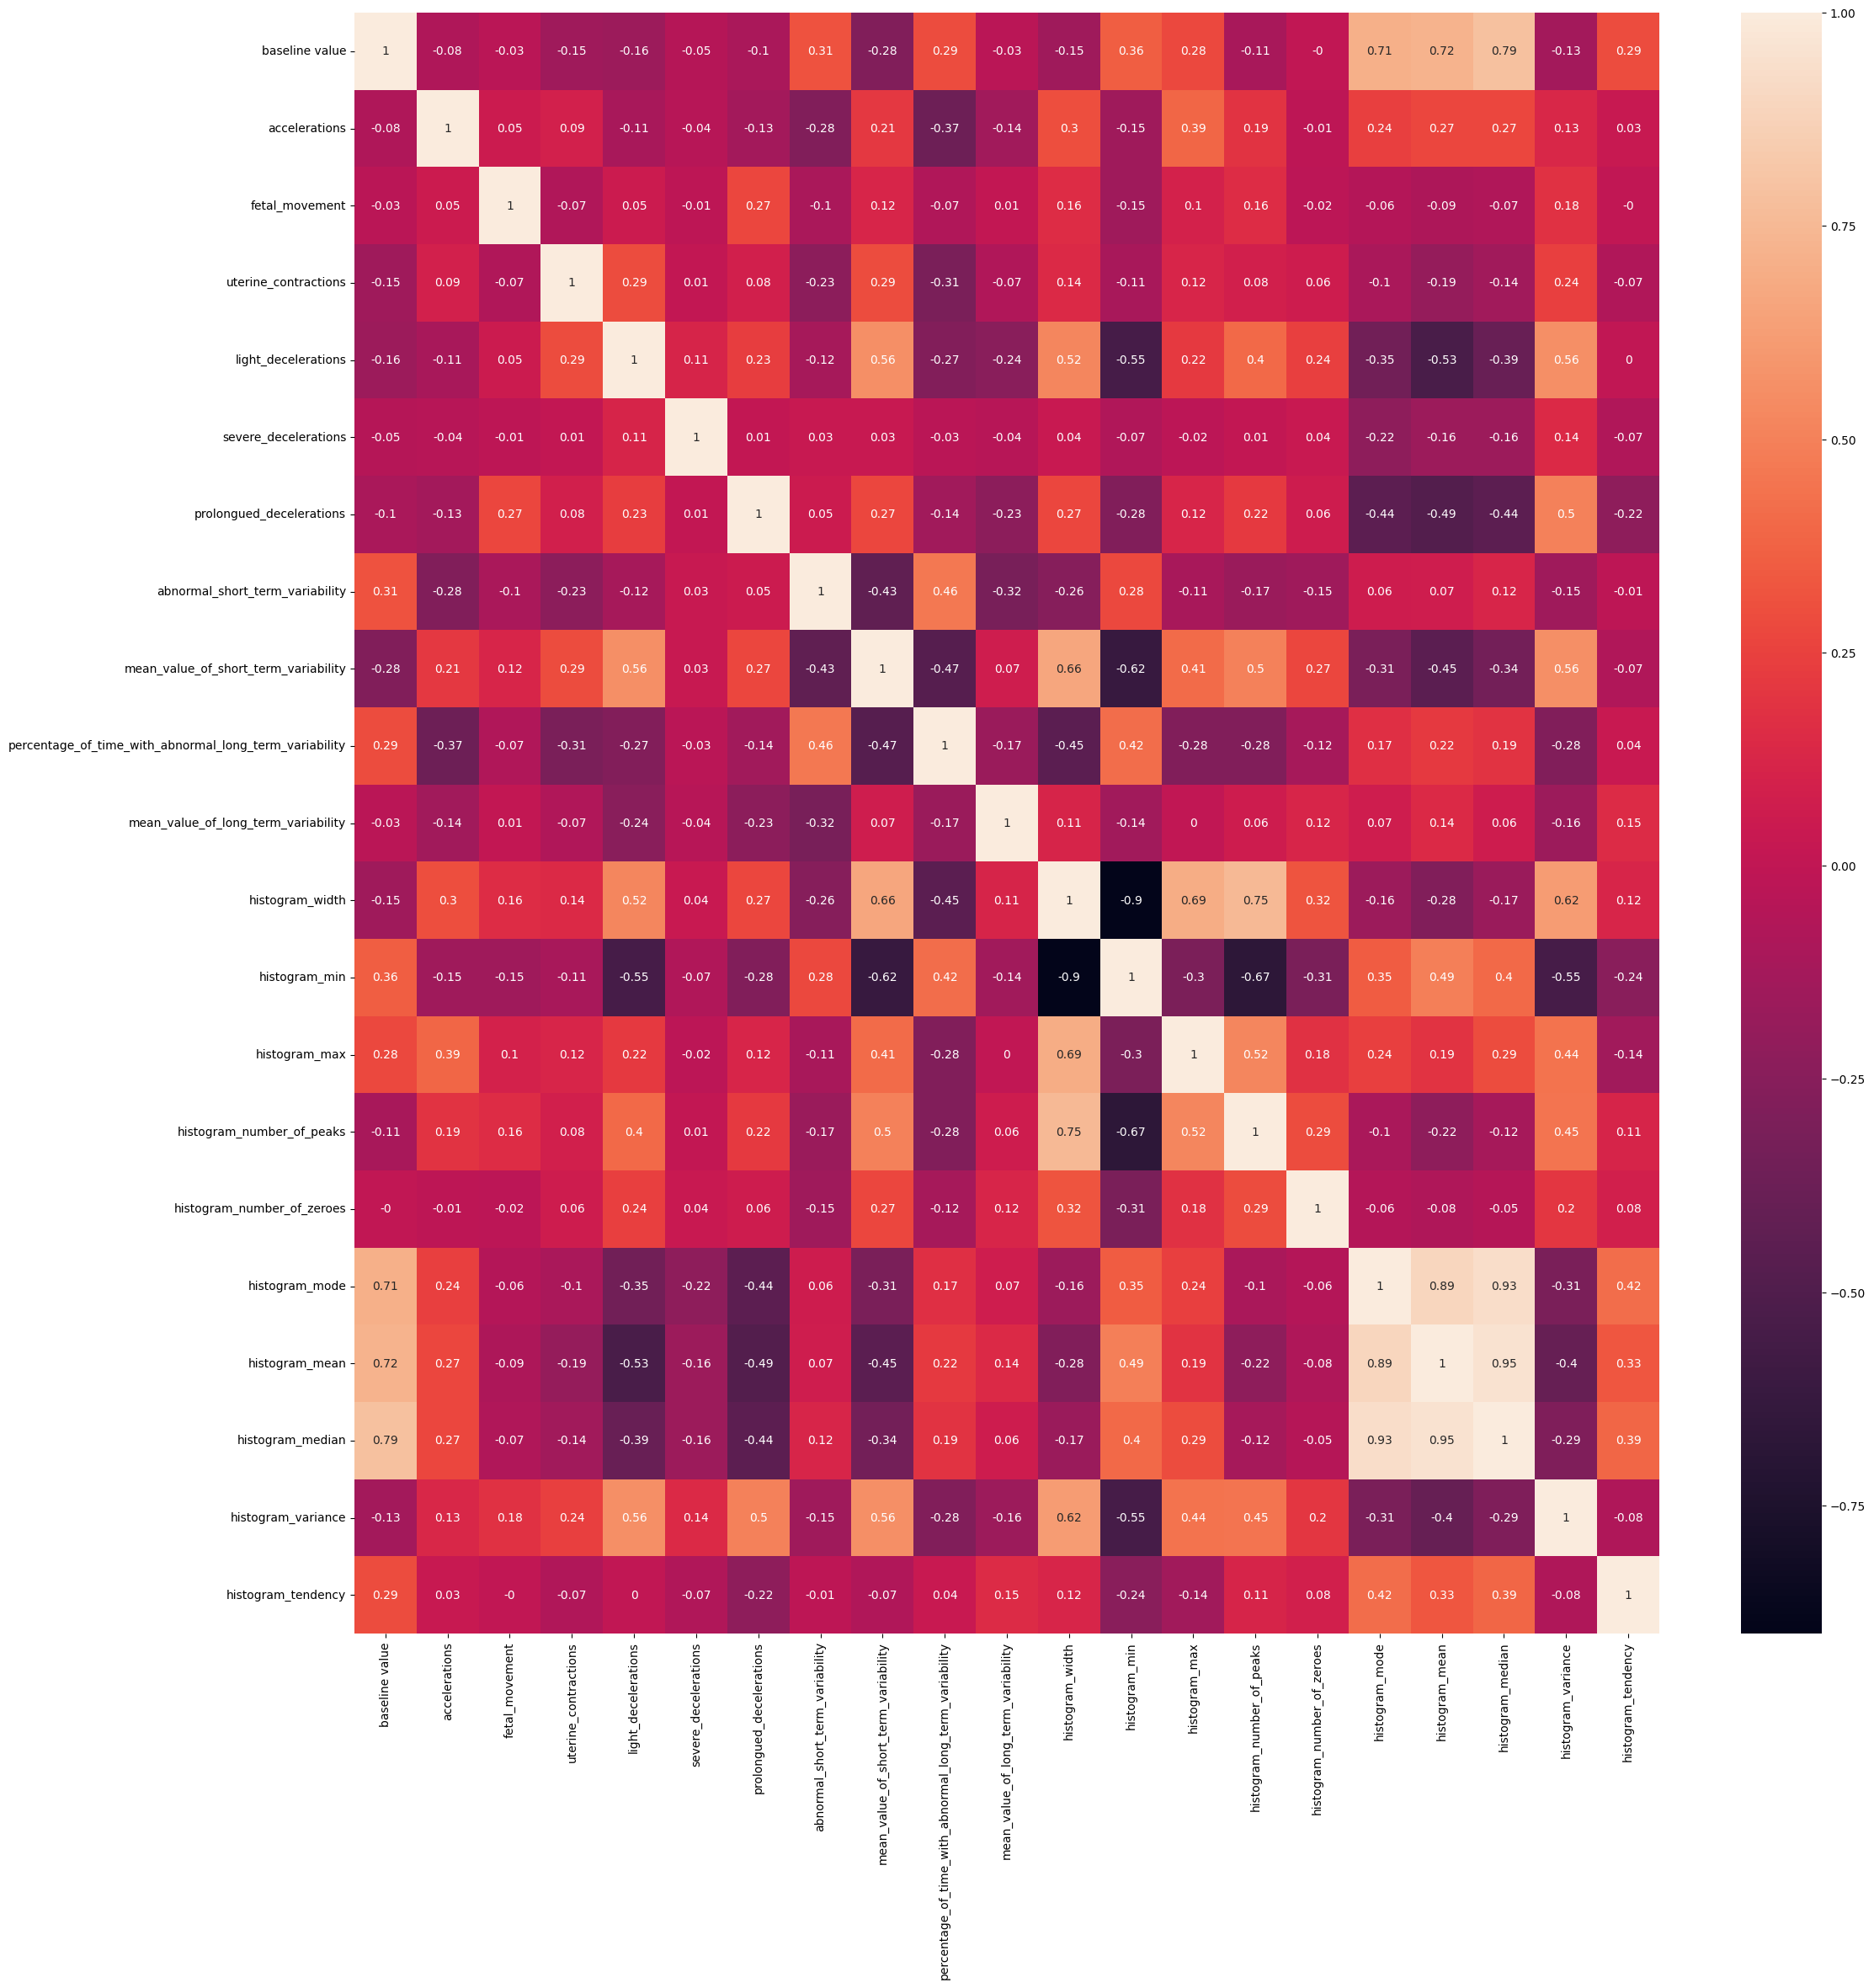

In [10]:
correlation_matrix=X.corr().round(2)
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True)

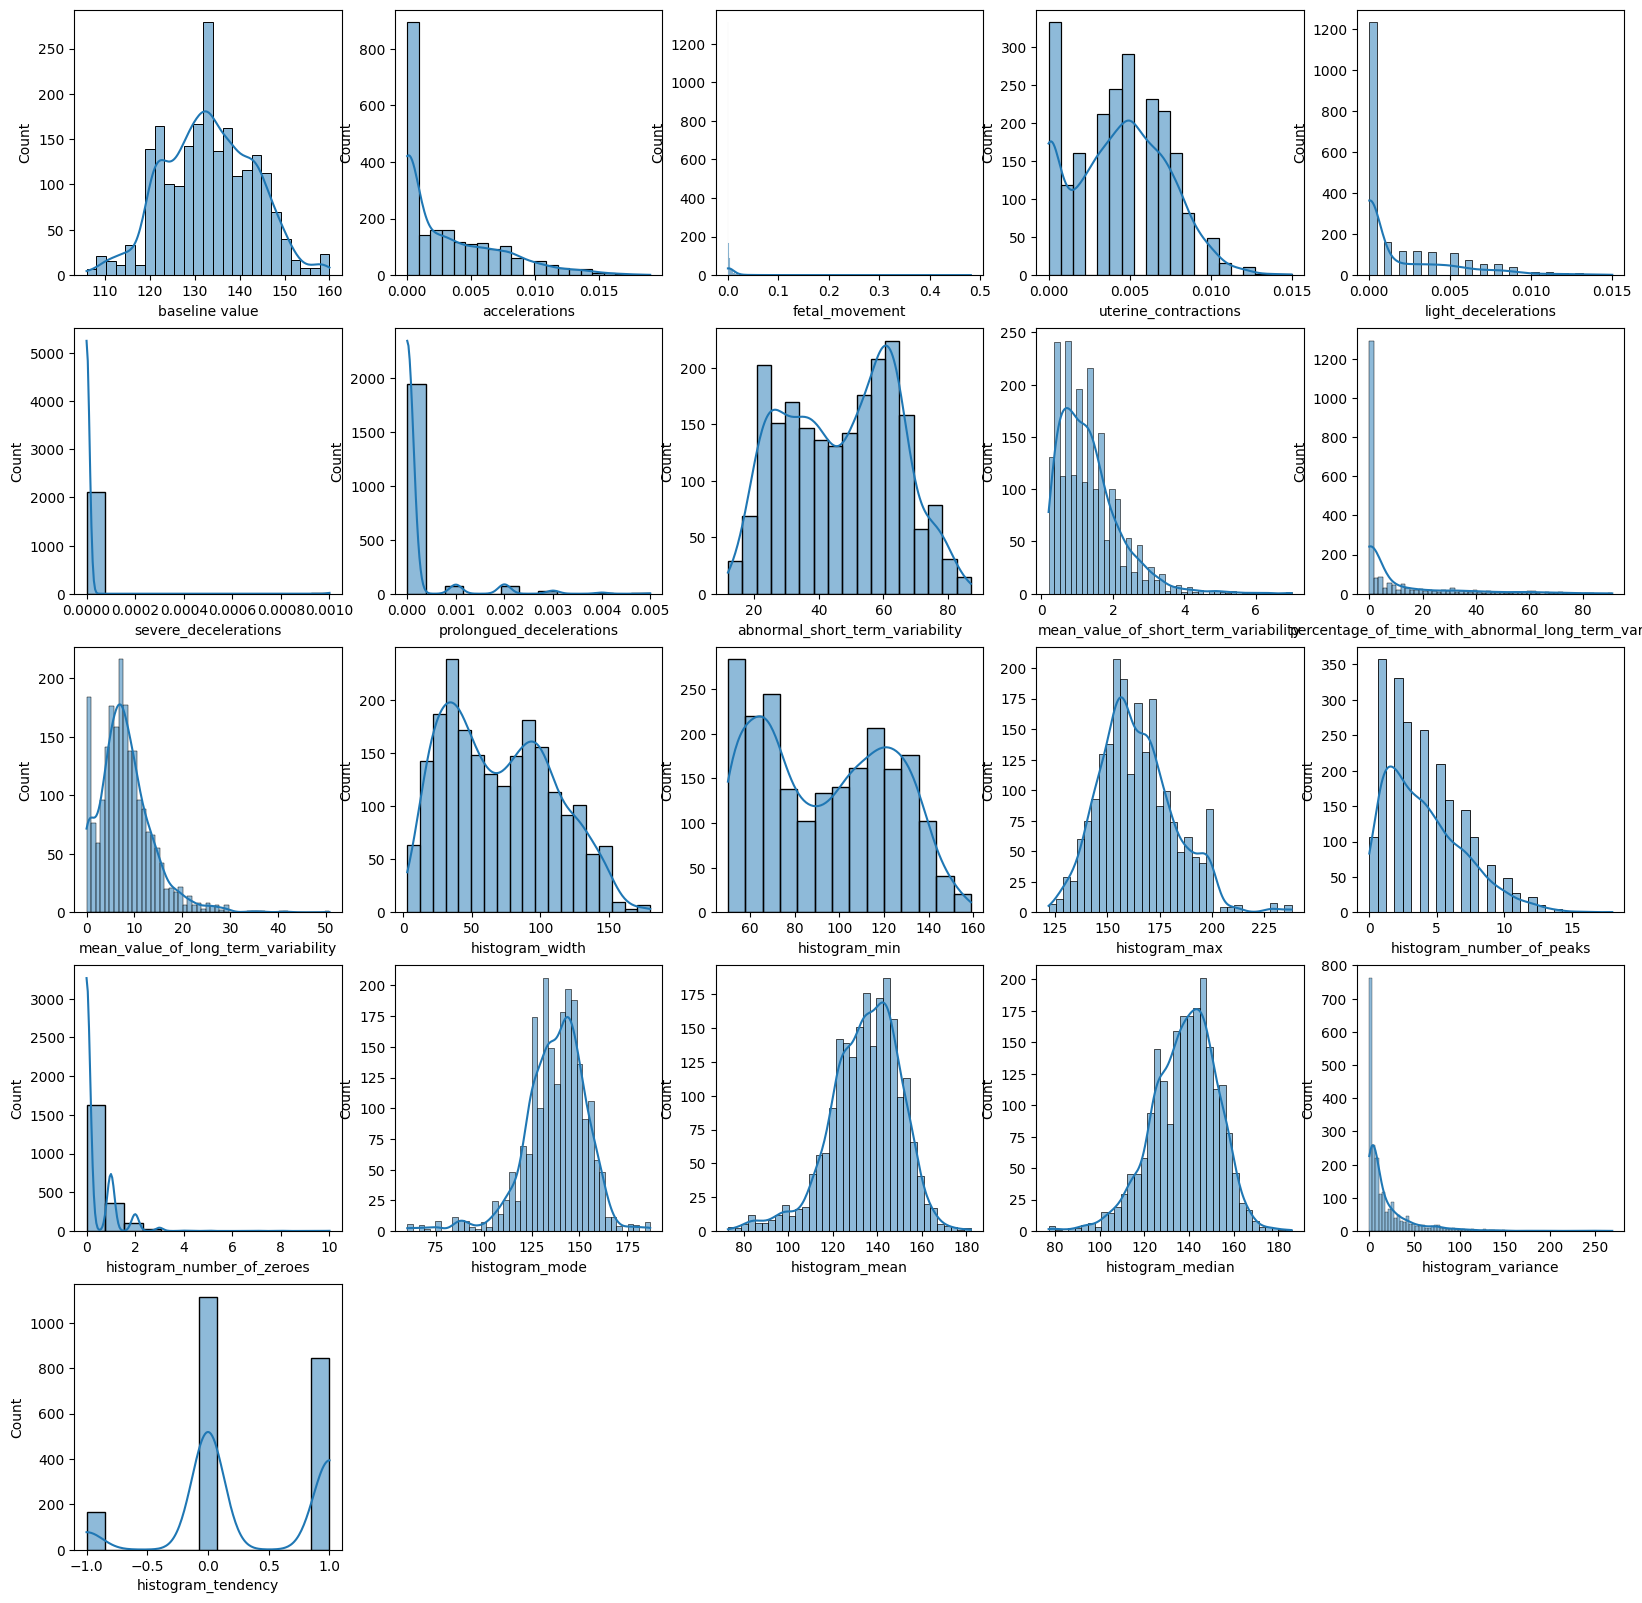

In [11]:
l=len(features)
plt.figure(figsize=(20,20))
for i in range(l):
  plt.subplot(l//4,5,i+1)
  sns.histplot(data=data,x=features[i],kde=True)

<Axes: xlabel='fetal_movement'>

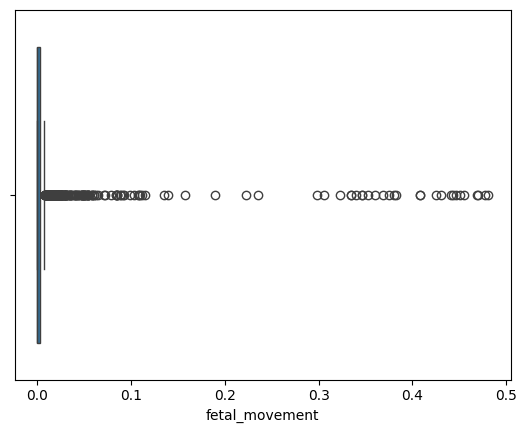

In [12]:
sns.boxplot(data=data,x='fetal_movement')

<Axes: xlabel='fetal_health', ylabel='count'>

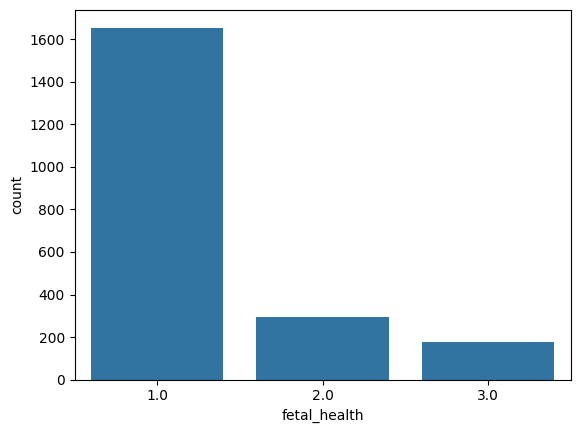

In [13]:
sns.countplot(data=data,x='fetal_health')

## **Feature Scaling**

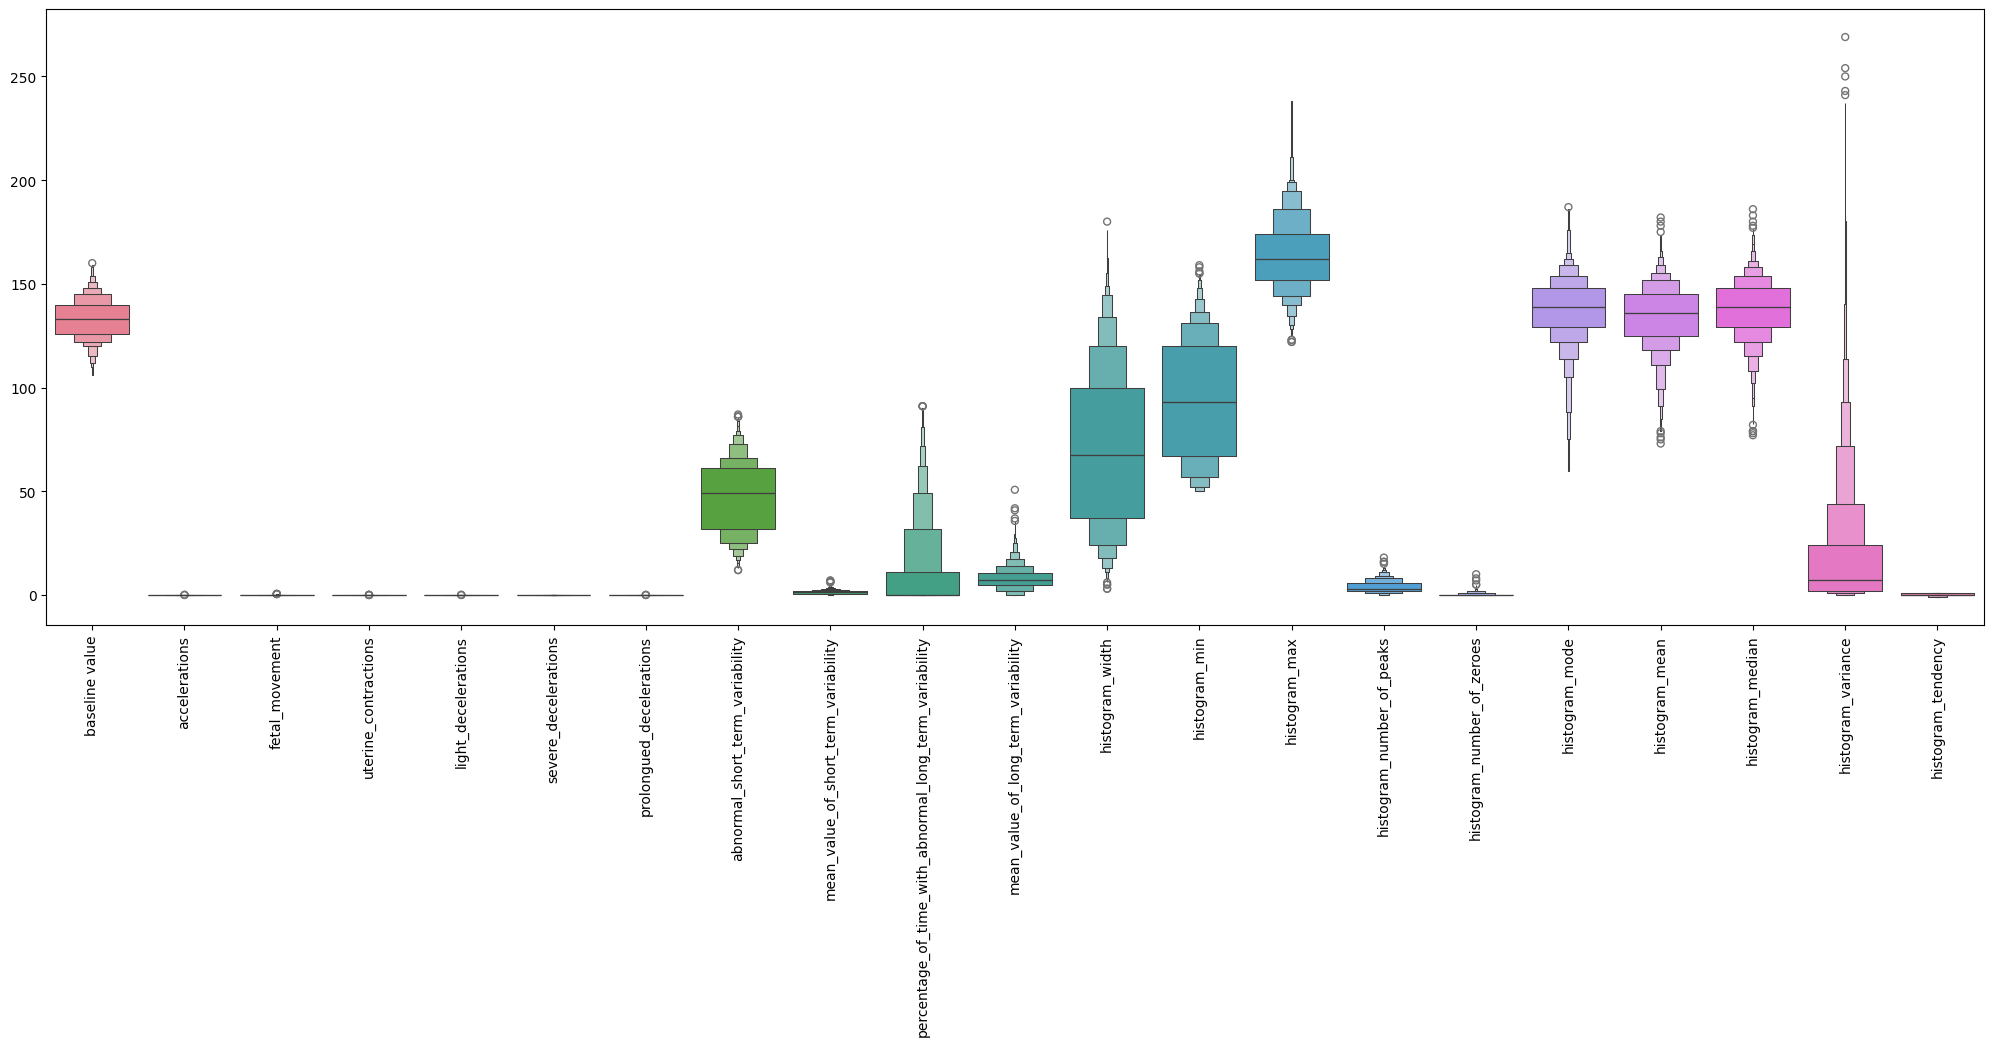

In [14]:
plt.figure(figsize=(25,8))
sns.boxenplot(data=X)
plt.xticks(rotation=90)
plt.show()

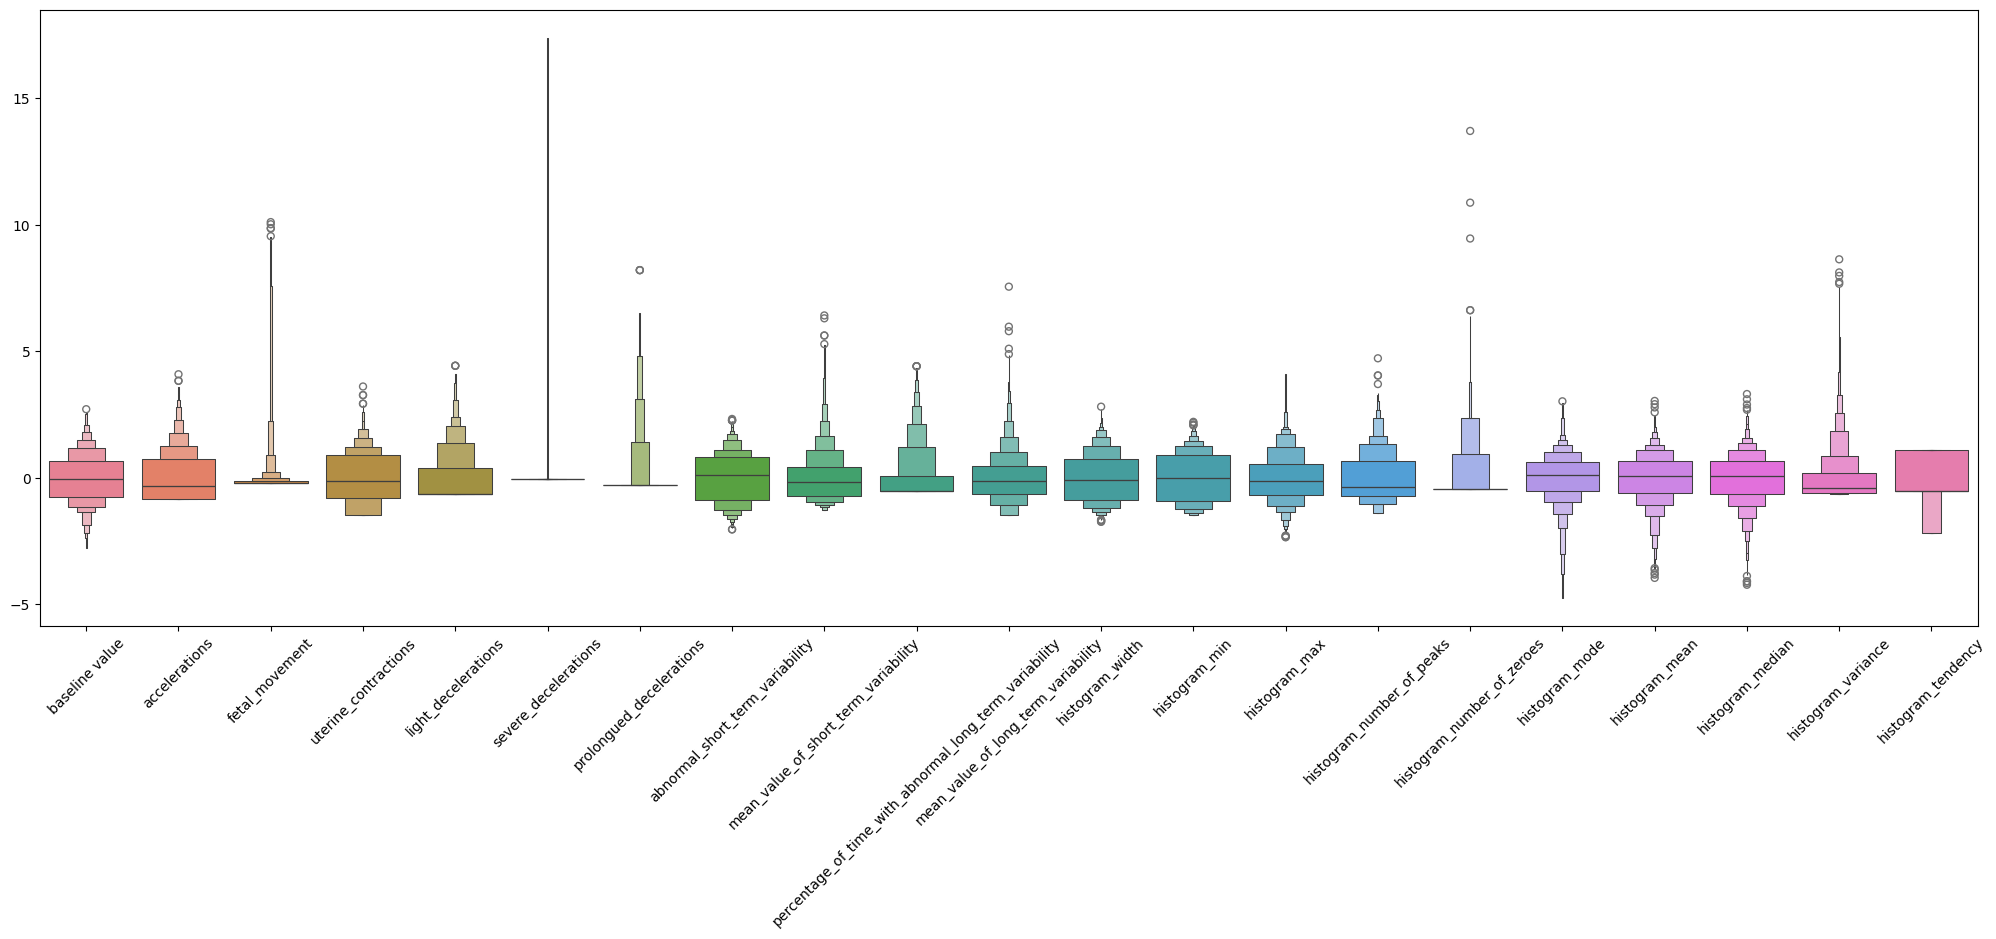

In [15]:
sc=StandardScaler().fit_transform(X)
X_scaled=pd.DataFrame(sc,columns=list(X.columns))

plt.figure(figsize=(25,8))
sns.boxenplot(data=X_scaled)
plt.xticks(rotation=45)
plt.show()

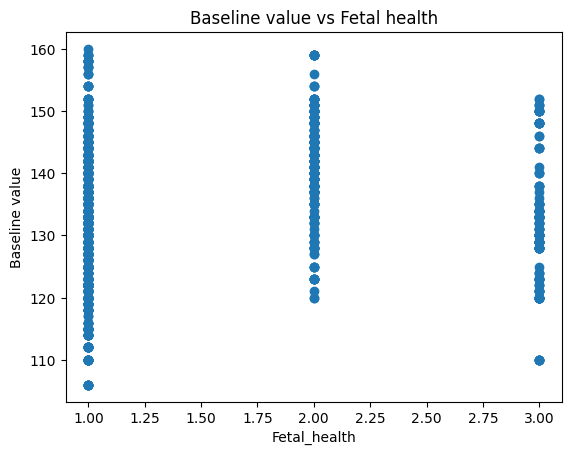

In [16]:
plt.scatter(y=data['baseline value'],x=data['fetal_health'])
plt.title('Baseline value vs Fetal health')
plt.xlabel('Fetal_health')
plt.ylabel('Baseline value')
plt.show()

## **Logistic Regression**

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(x_train.shape,y_test.shape)

(1700, 21) (426,)


In [37]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [39]:
model=LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred_log=model.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred_log))

0.8967136150234741


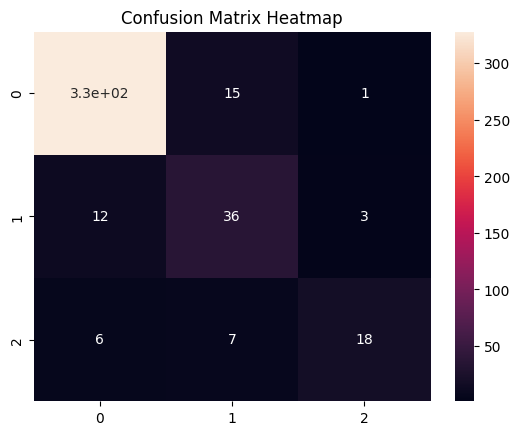

In [40]:
cm=confusion_matrix(y_test,y_pred_log)
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix Heatmap")
plt.show()

In [42]:
model.score(x_test_scaled,y_test)

0.8967136150234741

## **Linear Regression with target  variable as baseline value**

In [48]:
x=X.drop(columns=['baseline value','histogram_tendency','severe_decelerations'])
Y=data['baseline value']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2)
print(x_train.shape,y_test.shape)

(1700, 18) (426,)


In [50]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [54]:
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred=lr.predict(x_test_scaled)

In [55]:
lr.coef_

array([-2.91195507e+00, -4.58244302e-02, -1.31798066e-01,  2.40006624e+00,
        3.09819246e+00,  1.27817194e+00,  8.52814962e-01,  1.40922591e-01,
       -7.61267883e-02,  7.74529434e+13,  5.88450055e+13, -3.51961937e+13,
       -6.34138327e-01,  9.35569860e-02, -1.61768099e+00,  4.74828617e+00,
        7.46451347e+00, -2.64922255e-01])

In [56]:
r2_score(y_test,y_pred)

0.8554893927470159

## **Residual Analysis**

### 1. Residual distribution

mean of residuals is  -0.17470471807443763 
 standard deviation of residuals is  3.847874362462756


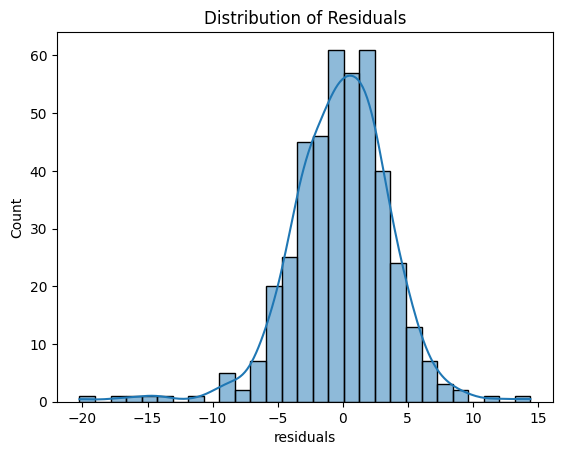

In [57]:
residuals=y_test-y_pred
print('mean of residuals is ',np.mean(residuals),'\n standard deviation of residuals is ',np.std(residuals))
sns.histplot(data=residuals,kde=True)
plt.xlabel('residuals')
plt.title('Distribution of Residuals')
plt.show()


### 2. Features vs Residuals

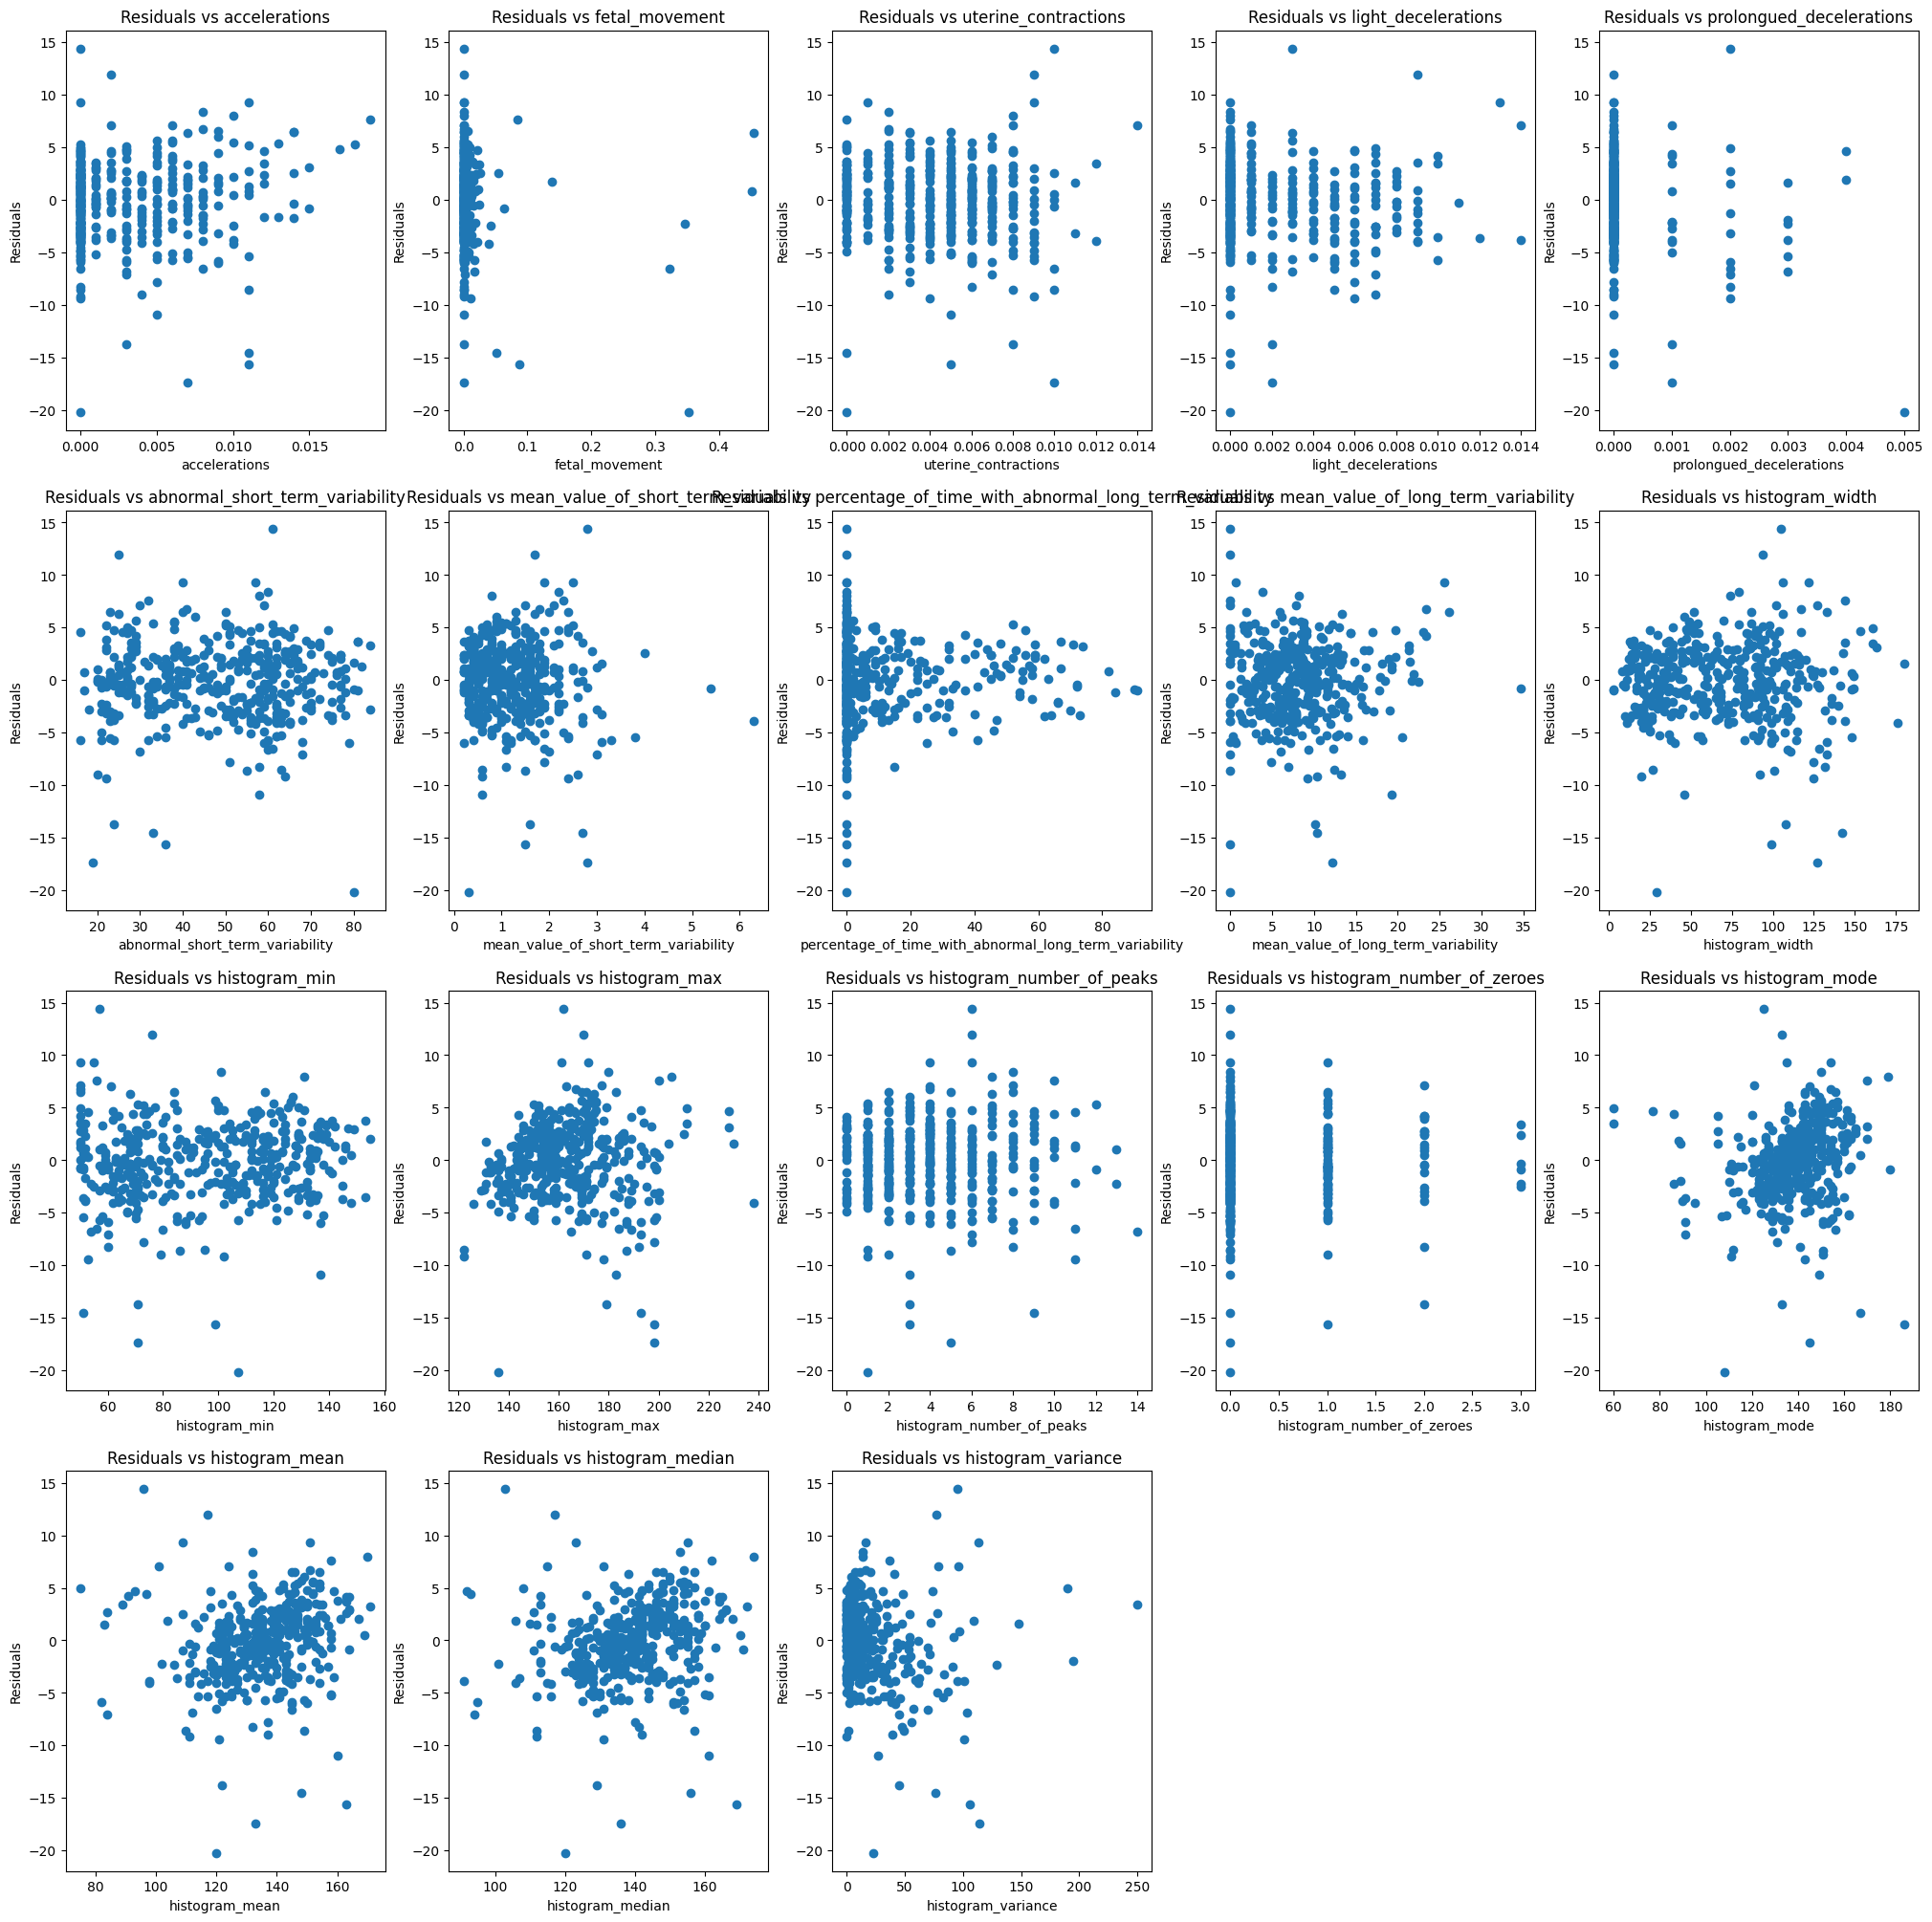

In [60]:
cols=x_test.columns
l1=len(cols)
plt.figure(figsize=(25,25))
for i in range(l1):
  plt.subplot(l1//4,5,i+1)
  plt.scatter(x=x_test[cols[i]],y=residuals)
  plt.xlabel(cols[i])
  plt.ylabel('Residuals')
  plt.title('Residuals vs '+cols[i])

### 3. Output vs Residuals

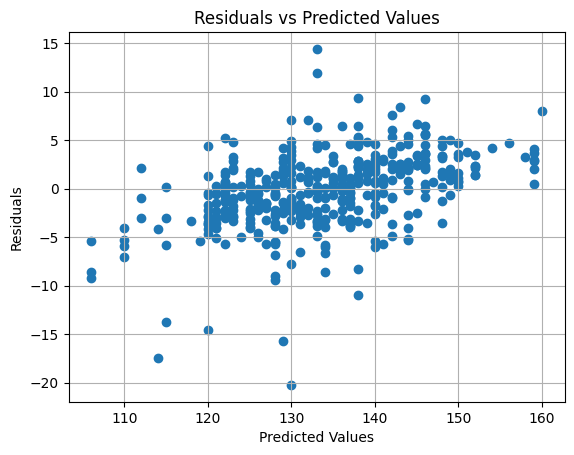

In [61]:
plt.scatter(y_test,residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()